<a href="https://colab.research.google.com/github/DeanAdrian/DSP-Lab/blob/main/58045_Lab04_CoffePasta/58045_Lab04_CoffePasta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Files and Libraries

The following code cells in this section, contain the libraries to be used for signal manipulation, as well as the code for cloning the github repository which contains the images to be manipulated.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/DeanAdrian/DSP-Lab.git

Cloning into 'DSP-Lab'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 113 (delta 34), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (113/113), 35.56 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
dir  = '/content/DSP-Lab/Files/Lab04/'

##Imported Images

The codes below are used for importing the images with the use of the cv2 library, followed by a lambda function which changes the colog scheme from BGR to RGB, in order to properly show the image.

The matplotlib library was used to plot the images, to see what the original images look like and their dimensions, before performing any sort of manipulation.

In [ ]:
image1 = cv2.imread(dir+'bird.png')
image2 = cv2.imread(dir+'flowers.png')
image3 = cv2.imread(dir+'lion.png')

In [ ]:
def rgb(image): return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image1 = rgb(image1)
image2 = rgb(image2)
image3 = rgb(image3)

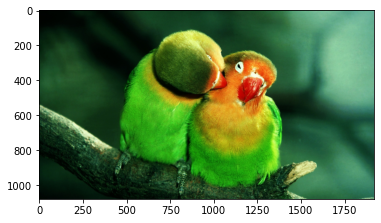

In [ ]:
plt.imshow(image1)
plt.show()

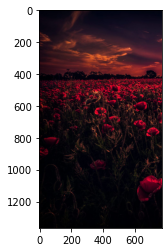

In [ ]:
plt.imshow(image2)
plt.show()

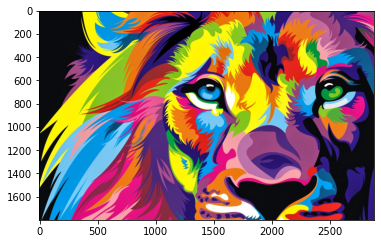

In [ ]:
plt.imshow(image3)
plt.show()

#Geometric operations


This section has two subsections where the images are to be manipulated, the first is resizing the image, which changes its dimensions and the second section is where images are cropped.

## Resizing

For the code cell below the image is scaled down. This is done by multiplying the images width and height to a set scale that is lower than 100, which in the case below is set to 20. Since the scaling is similar even though the image was scaled down it was able to maintain its original shape.

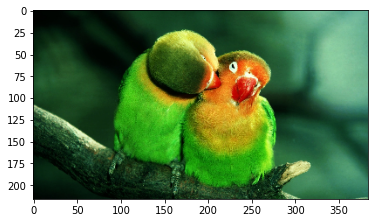

In [ ]:
scale_percent = 20
width = int(image1.shape[1] * scale_percent / 100)
height = int(image1.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(image1, dim)
plt.imshow(resized)
plt.show()

The following code cell does not scale down the image like the one above but instead changes its width to be similar to that of the first images width. This results in the image being stretched out as seen below.

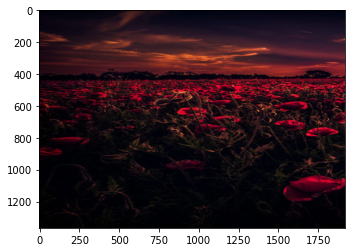

In [ ]:
scale_percent = 100
width = int(image1.shape[1] * scale_percent / 100) # use dimension of first image to widen image
height = int(image2.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(image2, dim)
plt.imshow(resized)
plt.show()

The code cell below, scales up the image to twice its original size, since the size of the figure is similar to when the images were originally imported, the change in the images size can instead be seen by the values on the axes of the image. The original image has a dimension of 1800x2880, and the image below has a dimension of 3600x5760.

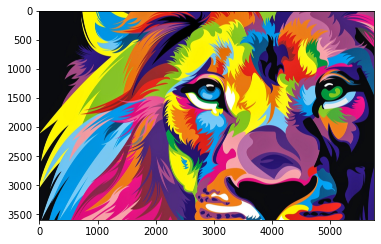

In [ ]:
scale_percent = 200
width = int(image3.shape[1] * scale_percent / 100)
height = int(image3.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(image3, dim)
plt.imshow(resized)
plt.show()

## Cropping

The codes in this section follow the same flow of codes only changing in some the values to control where the image will be cropped. The values contain two ranges, the first range contains the values from top to bottom and the second range are the values from left to right.

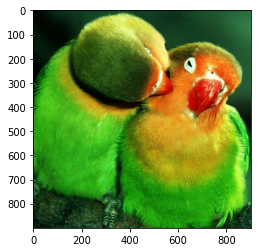

In [ ]:
cropped_image = (image1[100:1000, 500:1400]) # [top:bottom, left:right]
plt.imshow(cropped_image)
plt.show()

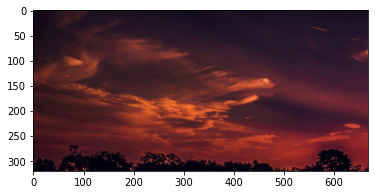

In [ ]:
cropped_image = (image2[100:420, 100:770]) # [top:bottom, left:right]
plt.imshow(cropped_image)
plt.show()

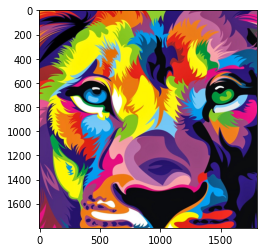

In [ ]:
cropped_image = (image3[0:1800, 1000:2800]) # [top:bottom, left:right]
plt.imshow(cropped_image)
plt.show()

#Channel operations


##RGB manipulation

The signal manipulations performed in this section contains the equalization of the RGB values present in the image. This was achieved in the function by splitting the image into array values that represent the pizels of the image as well as their intensity. These values are then equalized with the use of cv2's 'equalizeHist' function before being combined again to form a different output image.


In [ ]:
def equalizeRGB(image=None):
  ch_rgb = cv2.split(image)
  equ_rgb= []
  for channel in ch_rgb:
    equ_rgb.append(cv2.equalizeHist(channel))
  hequ_rgb = cv2.merge(equ_rgb)
  plt.imshow(hequ_rgb) 

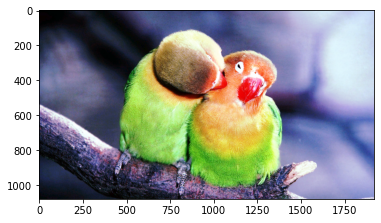

In [ ]:
equalizeRGB(image1)

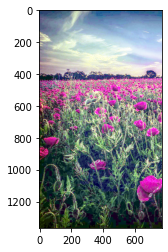

In [ ]:
equalizeRGB(image2)

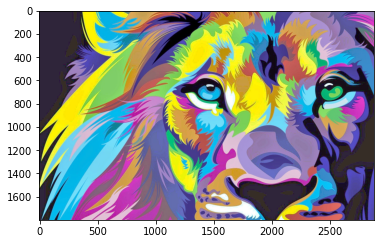

In [ ]:
equalizeRGB(image3)

##HSV manipulation

In [ ]:
def equalizeHSV(image=None):
  img_hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
  ch_hsv = cv2.split(img_hsv)
  ch_hsv_eq = ch_hsv[0], ch_hsv[1], cv2.equalizeHist(ch_hsv[2])
  hequ_hsv = cv2.merge(ch_hsv_eq)
  plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
  plt.axis('off') 

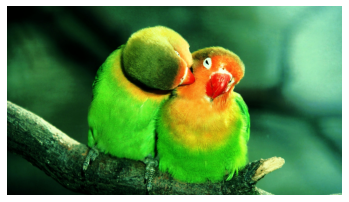

In [ ]:
equalizeHSV(image1)

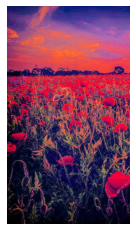

In [ ]:
equalizeHSV(image2)

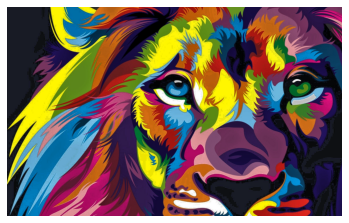

In [ ]:
equalizeHSV(image3)

#Image Correction operations


##Histogram Equalization

The function below does the similar thing as the function 'equalizeRGB' but also plots the histogram for the hue, saturation and the value channels of their respective image. This helps to see how the value between all 3 channels change to equalize the RGB values.

In [ ]:
def equalizeHistogram(image=None):
  ch_rgb = cv2.split(image)
  colors = ("r", "g", "b")
  equ_rgb= []
  for channel in ch_rgb:
      equ_rgb.append(cv2.equalizeHist(channel))
  hequ_rgb = cv2.merge(equ_rgb)

  plt.figure(figsize=(15, 9), dpi=80) 
  plt.subplot(221) 
  plt.imshow(image) 
  plt.title("Original Image") 
  plt.axis('off') 
  plt.subplot(223) 
  plt.title("Original Histogram") 
  plt.xlabel("Channel Value") 
  plt.ylabel("Frequency") 

  for (channel, color) in zip(ch_rgb, colors): 
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
    plt.plot(hist, color=color) 
    plt.xlim([0, 256])

  plt.subplot(222) 
  plt.imshow(hequ_rgb) 
  plt.title("Equalized Image") 
  plt.axis('off') 
  plt.subplot(224) 
  plt.title("Equalized Histogram") 
  plt.xlabel("Channel Value") 
  plt.ylabel("Frequency") 
  for (equ_channel, color) in zip(equ_rgb, colors): 
    hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
    plt.plot(hist, color=color) 
    plt.xlim([0, 256]) 
  plt.show()

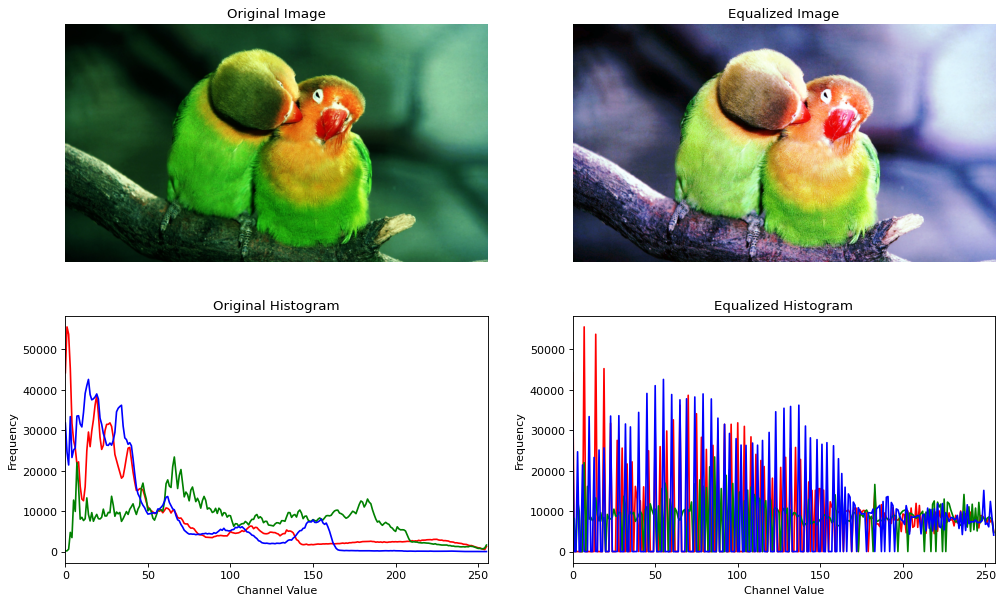

In [ ]:
equalizeHistogram(image1)

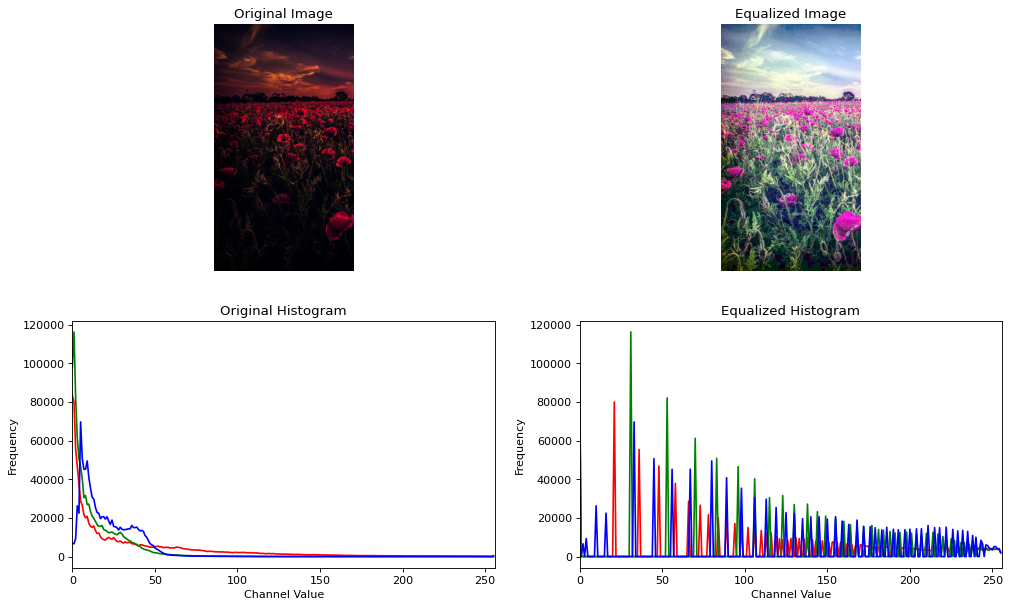

In [ ]:
equalizeHistogram(image2)

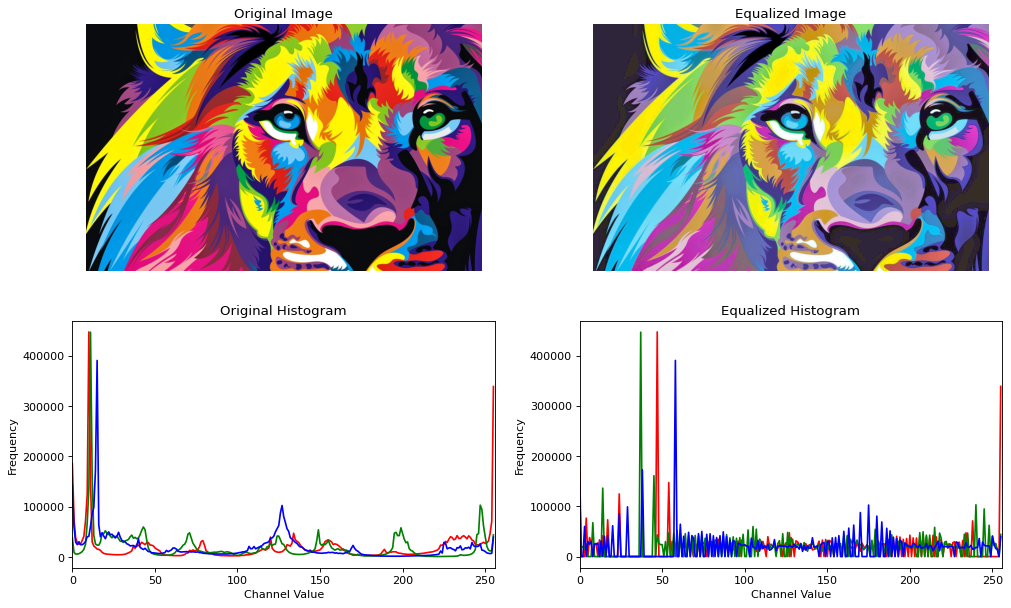

In [ ]:
equalizeHistogram(image3)

##Gamma Correction

In [ ]:
def correctGamma(image=None, gamma=10):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  inv_gamma = 1.0/gamma
  corrected_img = 255 * np.power(image/255,inv_gamma)
  plt.subplot(121), plt.title('Original'), plt.imshow(image, cmap='gray')
  plt.subplot(122), plt.title('Gamma Corrected'),plt.imshow(corrected_img, cmap='gray')
  plt.show()

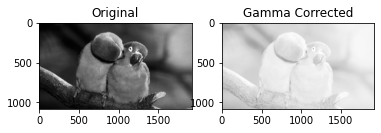

In [ ]:
correctGamma(image1)

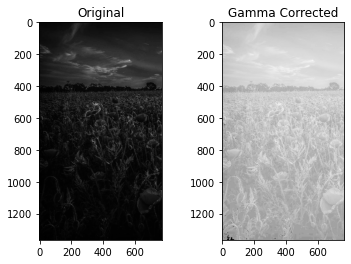

In [ ]:
correctGamma(image2)

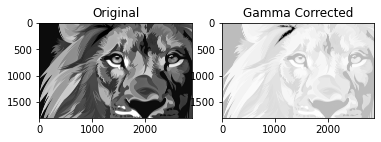

In [ ]:
correctGamma(image3)

#A signal operation not done in the lecture

##Adjust brightness

In this section the signal manipulation performed in this section, adjusts the brightness of the image. The first code cell brightens the image, and the second cell darkens it. 

This was done by getting the array values of the image and then creating another array of the same shape as the image, the value of the second array all have the same values, a value greater than one will brighten the image, while a value lower than one will darken it.

These two arrays are then multiplied to create the new image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


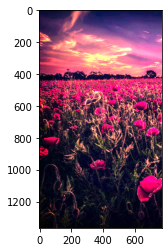

In [ ]:
img = np.array(image2, dtype=float)
img /= 255.0

a_channel = np.ones(img.shape, dtype=float)*4
brighter_image = img*a_channel
plt.imshow(brighter_image)

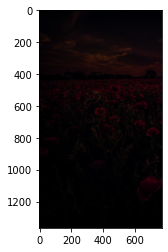

In [ ]:
img = np.array(image2, dtype=float)
img /= 255.0

a_channel = np.ones(img.shape, dtype=float)/4
darker_image = img*a_channel
plt.imshow(darker_image)

## Overlaying

Lastly, the cell below overlays two images on top of each other. This was first done by changing the size of one image to have the same size of the second image. The two images are then weighted on top of each other with differing alpha values which changes the opacity of the image, resulting in the figure below.

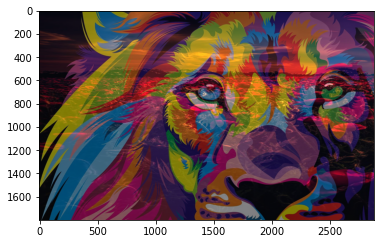

In [ ]:
width = int(image3.shape[1]) 
height = int(image3.shape[0])
dim = (width, height)

image2_resize = cv2.resize(image2, dim) # resize image to have same size
dst = cv2.addWeighted(image3,0.5,image2_resize,0.7,0)
plt.imshow(dst)